In [156]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

# Data

In [157]:
jobs_gender = pd.read_csv(
    "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2019/2019-03-05/jobs_gender.csv"
)
earnings_female = pd.read_csv(
    "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2019/2019-03-05/earnings_female.csv"
) 
employed_gender = pd.read_csv(
    "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2019/2019-03-05/employed_gender.csv"
)

## Summarise jobs gender

In [158]:
# https://stackoverflow.com/questions/14529838/apply-multiple-functions-to-multiple-groupby-columns

def summarize_jobs_gender(data):
    d = {}
    
    d['total_earnings'] = (data['total_earnings'] * data['total_workers']).sum() / data['total_workers'].sum()
    d['total_earnings_male'] = (data['total_earnings_male'] * data['workers_male']).sum() / data['workers_male'].sum()
    d['total_earnings_female'] = (data['total_earnings_female'] * data['workers_female']).sum() / data['workers_female'].sum()

    d['total_workers'] = data['total_workers'].sum()
    d['workers_male'] = data['workers_male'].sum()
    d['workers_female'] = data['workers_female'].sum()

    d['wage_percent_of_male'] = d['total_earnings_female'] / d['total_earnings_male']
    
    return pd.Series(d)

## By major category

In [159]:
# ~jobs_gender.isnull().any(axis=1) same as complete.cases
by_year_major_category = jobs_gender[~jobs_gender.isnull().any(axis=1)]\
                                        .groupby(['year', 'major_category'], as_index=False)\
                                        .apply(summarize_jobs_gender)

In [160]:
by_year_major_category.head()

,year,major_category,total_earnings,total_earnings_male,total_earnings_female,total_workers,workers_male,workers_female,wage_percent_of_male
0,2013,"Computer, Engineering, and Science",75478.461685,78901.687724,65512.236814,6335069.0,4812962.0,1522107.0,0.830302
1,2013,"Education, Legal, Community Service, Arts, and...",54033.360766,65404.198537,46993.860989,9764818.0,3736750.0,6028068.0,0.718514
2,2013,Healthcare Practitioners and Technical,76434.259101,112396.575170,62080.606739,5590796.0,1619171.0,3971625.0,0.552335
3,2013,"Management, Business, and Financial",69401.824585,79232.899793,58135.622407,18018722.0,10291003.0,7727719.0,0.733731
4,2013,"Natural Resources, Construction, and Maintenance",40190.940453,40608.980247,31181.646009,6065182.0,5787288.0,277894.0,0.767851


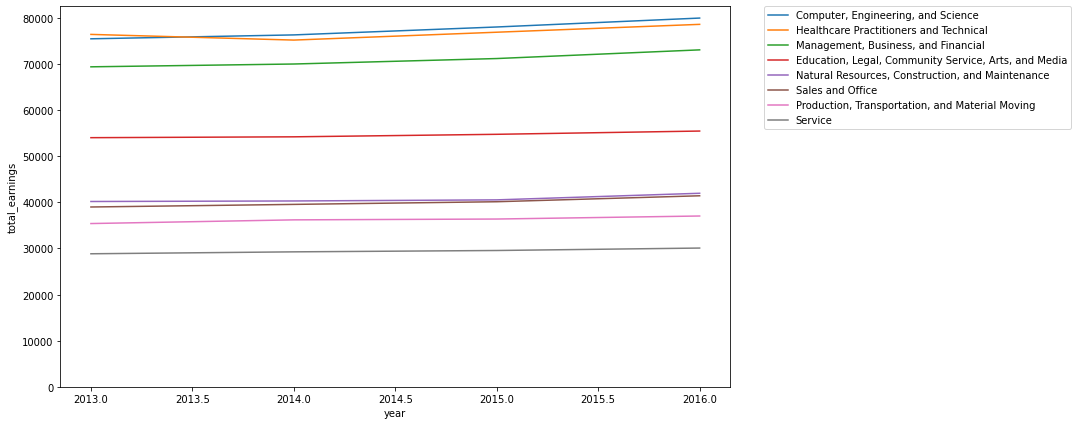

In [161]:
f, ax = plt.subplots(figsize=(12, 7))

# sort by major max total earnings
hue_order = by_year_major_category.groupby('major_category')['total_earnings'].max().sort_values(ascending=False).index

sns.lineplot(x='year', y='total_earnings', hue='major_category', data=by_year_major_category, 
             hue_order=hue_order, ax=ax)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# start y axis at 0
plt.ylim(0, )
plt.show()

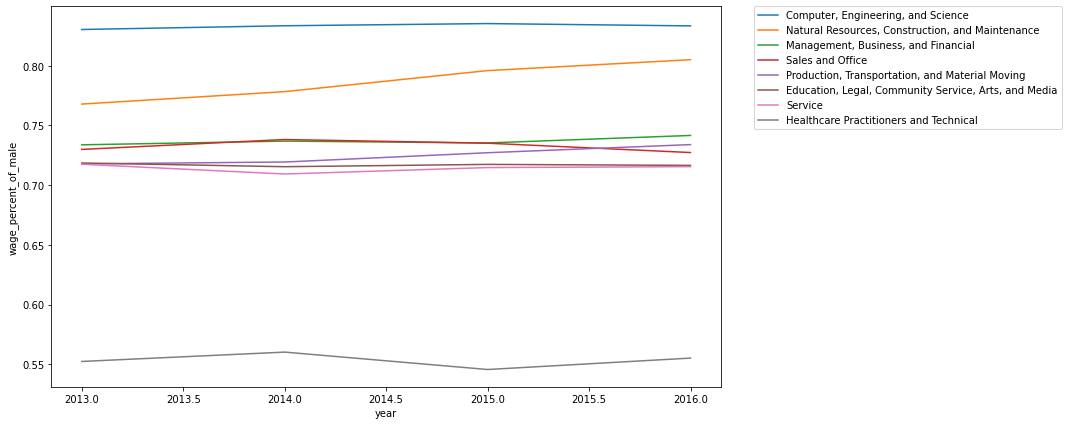

In [162]:
f, ax = plt.subplots(figsize=(12, 7))

# sort by major max wage percentge of male
hue_order = by_year_major_category.groupby('major_category')['wage_percent_of_male'].max().sort_values(ascending=False).index

sns.lineplot(x='year', y='wage_percent_of_male', hue='major_category', data=by_year_major_category, 
             hue_order=hue_order, ax=ax)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

## By minor category 2016

In [163]:
by_minor_category_2016 = jobs_gender[jobs_gender.year == 2016].\
                                            groupby(['minor_category', 'major_category'], as_index=False).\
                                            apply(summarize_jobs_gender)

In [164]:
by_minor_category_2016.head()

,minor_category,major_category,total_earnings,total_earnings_male,total_earnings_female,total_workers,workers_male,workers_female,wage_percent_of_male
0,Architecture and Engineering,"Computer, Engineering, and Science",81871.361498,84147.575054,71364.695025,2437331.0,2095090.0,342241.0,0.848090
1,"Arts, Design, Entertainment, Sports, and Media","Education, Legal, Community Service, Arts, and...",52192.837543,56522.992955,48488.731964,1847137.0,1049103.0,798034.0,0.857859
2,Building and Grounds Cleaning and Maintenance,Service,26964.678746,30061.624461,22263.912258,3516387.0,2331552.0,1184835.0,0.740609
3,Business and Financial Operations,"Management, Business, and Financial",64995.034275,76139.639997,57708.620121,6123442.0,2814981.0,3308461.0,0.757931
4,Community and Social Service,"Education, Legal, Community Service, Arts, and...",44473.887555,45858.118003,43726.052194,1965931.0,706430.0,1259501.0,0.953507


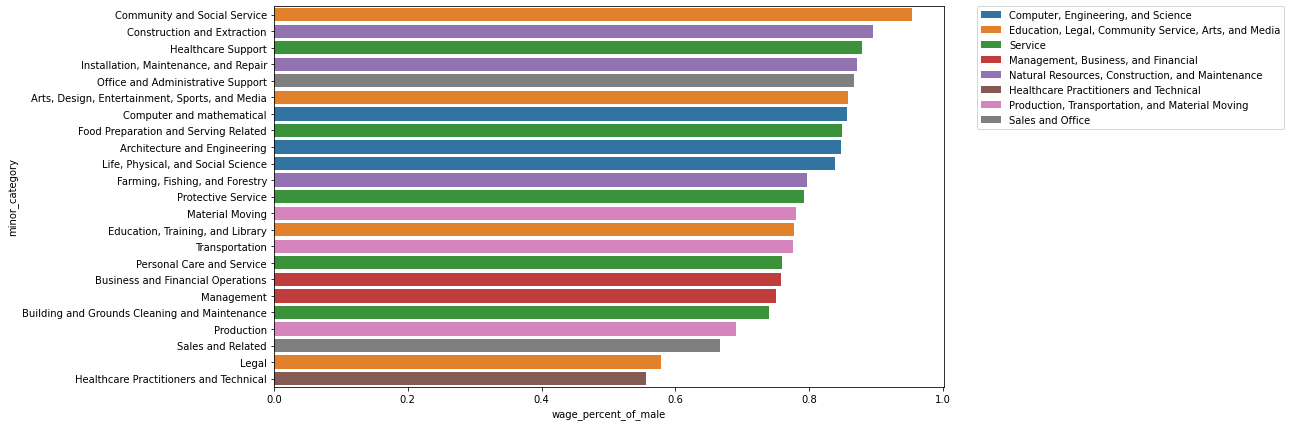

In [165]:
f, ax = plt.subplots(figsize=(12, 7))

sns.barplot(x='wage_percent_of_male', y='minor_category', hue='major_category', data=by_minor_category_2016, dodge=False,
            order=by_minor_category_2016.sort_values(by='wage_percent_of_male', ascending=False)['minor_category'],
            ax=ax)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

## Plotly
I dont use the plotly library for the purpose of this repo this staying using matplotlib and seaborn

In [166]:
data = jobs_gender[(jobs_gender.year == 2016) & 
                   (jobs_gender.major_category == 'Healthcare Practitioners and Technical')].copy()

data['female_percentage'] = data['workers_female'] / data['total_workers']

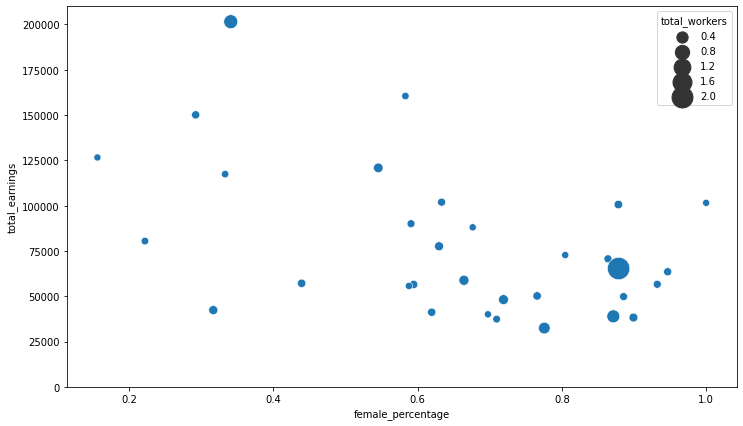

In [167]:
f, ax = plt.subplots(figsize=(12, 7))

sns.scatterplot(x='female_percentage', y='total_earnings', size='total_workers', sizes=(50, 500), data=data, ax=ax)

plt.ylim(0, )
plt.show()

In [168]:
data = jobs_gender[(jobs_gender.year == 2016) & (jobs_gender.total_workers >= 20000) & 
                   (jobs_gender.major_category == 'Computer, Engineering, and Science')].copy()

data['female_percentage_workforce'] = data['workers_female'] / data['total_workers']
data['female_percentage_salary'] = data['total_earnings_female'] / data['total_earnings_male']

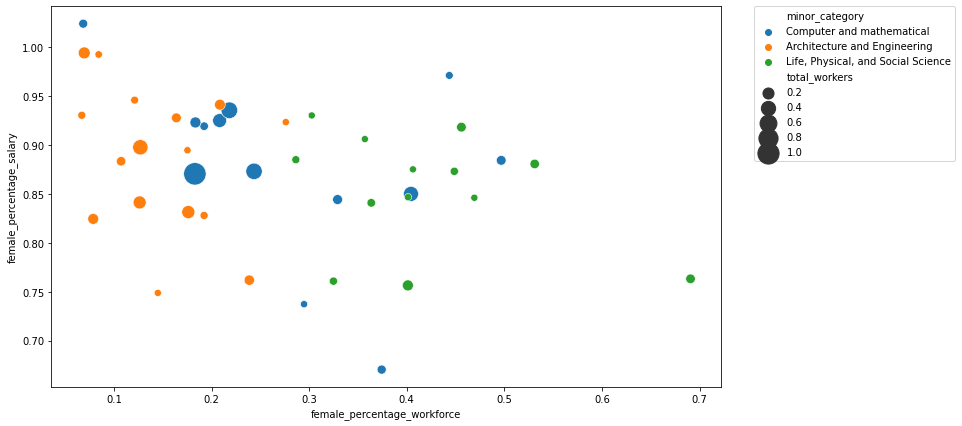

In [169]:
f, ax = plt.subplots(figsize=(12, 7))

sns.scatterplot(x='female_percentage_workforce', y='female_percentage_salary', size='total_workers', 
                hue='minor_category', sizes=(50, 500), data=data, ax=ax,)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()